# matplotlib 画图

### 画折线图 

plt.plot(x,y,format_string,**kwargs)

> * x：x轴数据，列表或数组，可选  
> * y：y轴数据，列表或数组  
> * format_string 由颜色字符，风格字符，和标记字符  

常用参数：

color:控制颜色，color=’green’  
linestyle:线条风格，linestyle='-’  
marker:标记风格，marker = ‘o’  
markerfacecolor:标记颜色，markerfacecolor = ‘blue’  
markersize:标记尺寸，markersize = ‘20’  

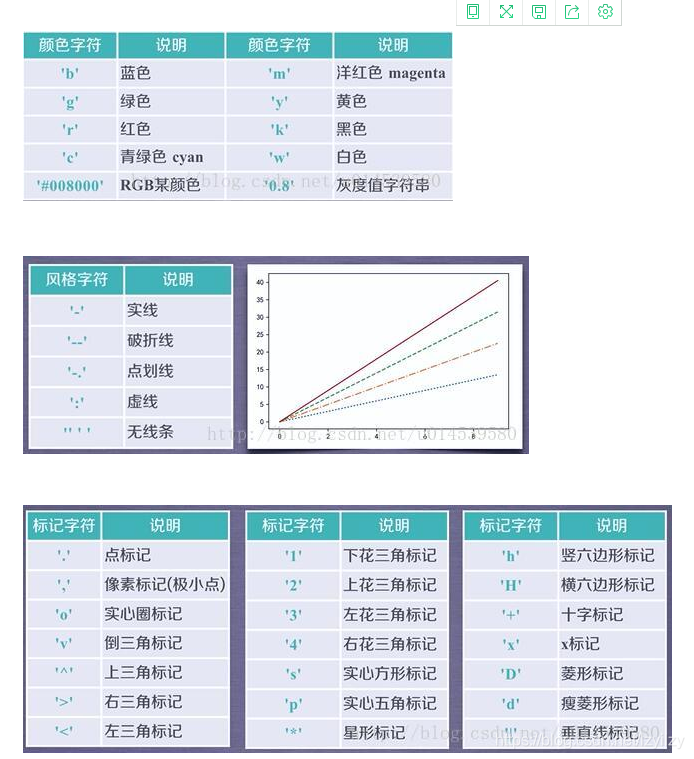

In [5]:
# 导入模块
import matplotlib.pyplot as plt

In [6]:
#获取数据
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
df.head(5)

date   open  close   high    low     volume    code
0  2020-01-02  16.65  16.87  16.95  16.55  1530231.0  000001
1  2020-01-03  16.94  17.18  17.31  16.92  1116194.0  000001
2  2020-01-06  17.01  17.07  17.34  16.91   862083.0  000001
3  2020-01-07  17.13  17.15  17.28  16.95   728607.0  000001
4  2020-01-08  17.00  16.66  17.05  16.63   847824.0  000001

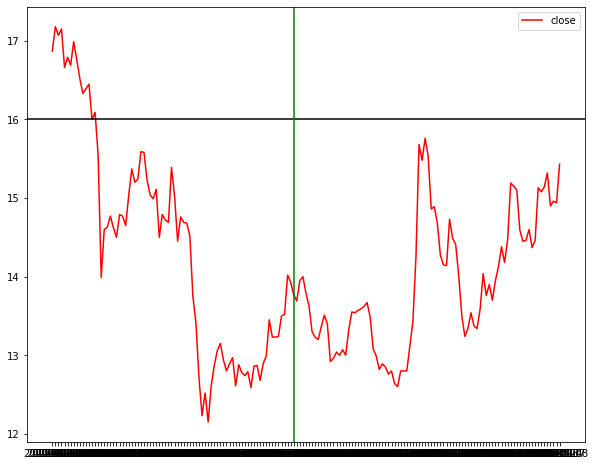

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(df.date, df.close, color = 'red',linestyle='-',label='close')
plt.axhline(y=16,ls="-",c="black") #画水平直线
plt.axvline(x='2020-05-06',ls="-",c="green")#添加垂直直线
plt.legend()
plt.show()

### 画柱状图

bar(x, height, width=0.8, bottom=None, ***, align='center', data=None, **kwargs)

参数说明

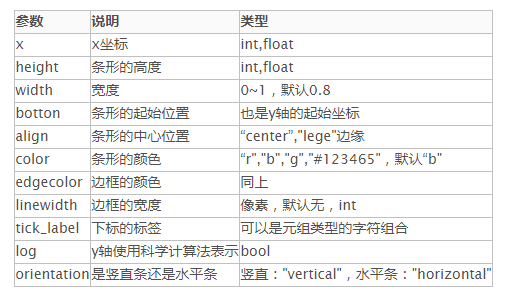

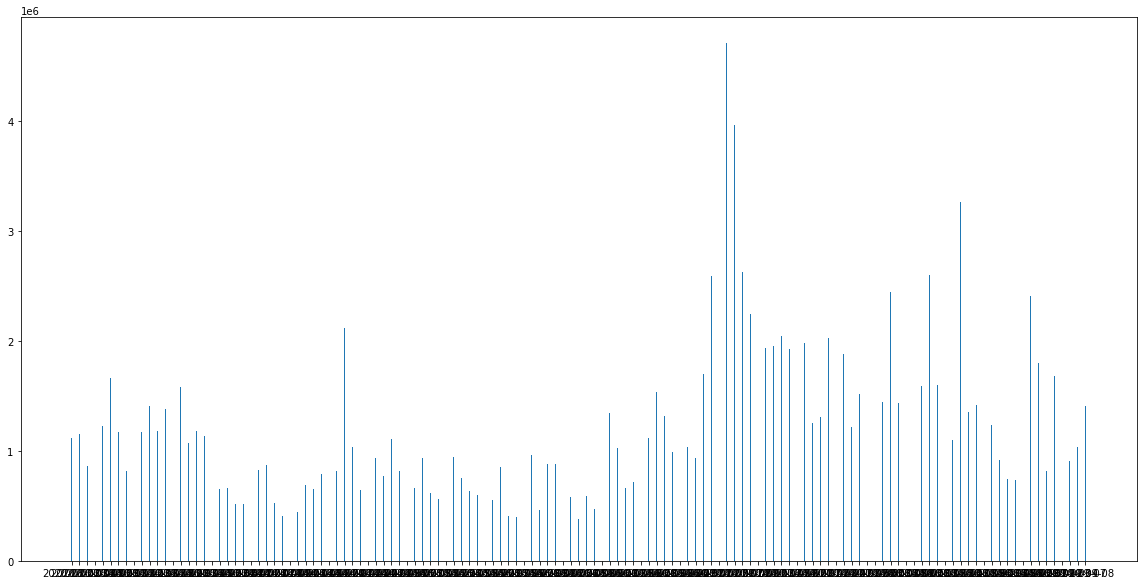

In [18]:
#获取数据
import tushare as ts
df = ts.get_k_data('000001','2020-03-01')
df.head(5)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
plt.bar(x=df.date, height=df.volume, width=0.1, orientation="vertical")
plt.show()

### 散点图

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

基本参数:
> * x, y → 散点的坐标  
> * s → 散点的面积  
> * c → 散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）  
> * marker → 散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）  
> * alpha → 散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）  
> * linewidths →散点的边缘线宽  
> * edgecolors → 散点的边缘颜色  

In [30]:
import tushare as ts
df = ts.get_k_data('000001','2020-06-01')
df.head(5)

date   open  close   high    low    volume    code
97   2020-06-01  13.10  13.32  13.39  13.08  882961.0  000001
98   2020-06-02  13.29  13.55  13.63  13.28  883459.0  000001
99   2020-06-03  13.64  13.54  13.88  13.50  956803.0  000001
100  2020-06-04  13.53  13.57  13.64  13.41  583066.0  000001
101  2020-06-05  13.60  13.59  13.62  13.43  383027.0  000001

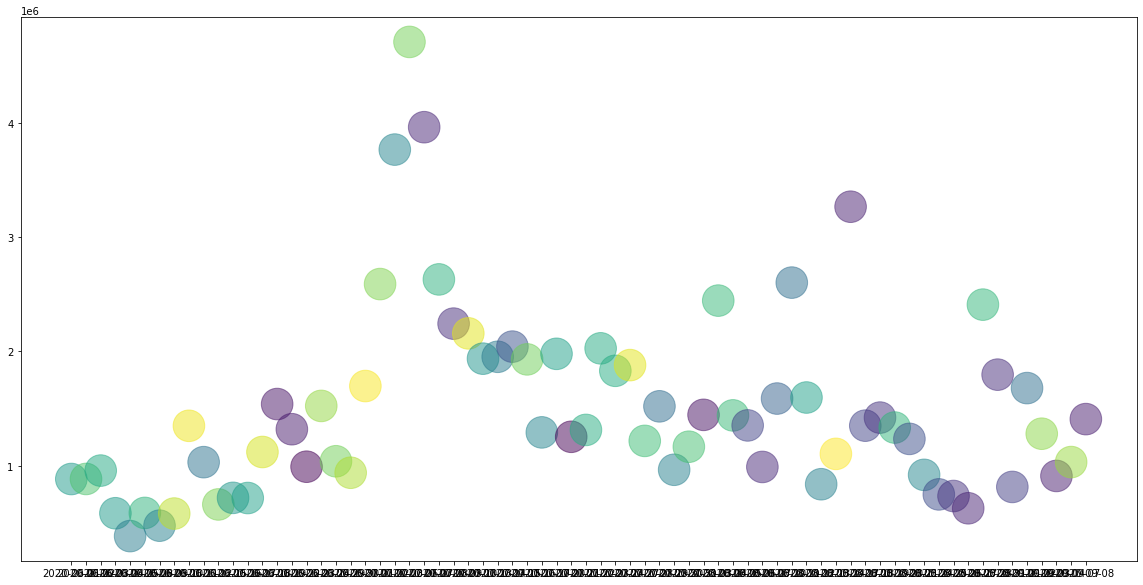

In [31]:
import numpy as np
rng = np.random.RandomState(0)
colors = rng.rand(70)  # 随机产生50个用于颜色映射的数值
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
# plt.scatter(x=df.date, y = df.volume,s=1000, c='yellow',marker="o")
plt.scatter(x=df.date, y = df.volume,s=1000, c=colors,alpha=0.5,marker="o",cmap='viridis')
plt.show()

### 最大回测图

In [36]:
import tushare as ts
df = ts.get_k_data('000001','2020-06-01')

13.24
15.76


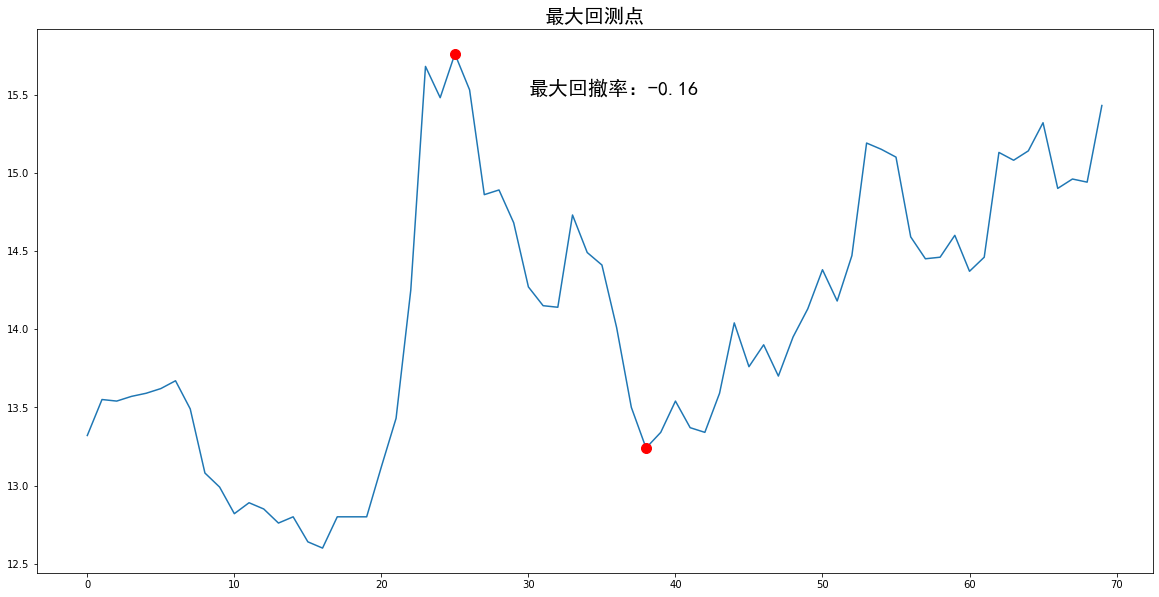

In [40]:
close_list = df['close'].values
index_j =np.argmax(np.maximum.accumulate(close_list)-close_list)  #最高点后最低点的位置
index_i =np.argmax(close_list[:index_j])      #最高点的位置
d = close_list[index_j]-close_list[index_i]
t = round((close_list[index_j]-close_list[index_i])/close_list[index_i],2)
print(close_list[index_j])
print(close_list[index_i])
t = str(t)
fig=plt.figure(figsize=(20,10))
plt.plot(close_list)
plt.plot([index_i,index_j],[close_list[index_i],close_list[index_j]],'o',color='r',markersize=10)
plt.title("最大回测点",fontproperties = 'SimHei',size=20)
# plt.savefig('最大回测点.png')
plt.text(30,15.5,'最大回撤率：'+t,size=20,family='SimHei')
# plt.savefig('最大回测.png')
plt.show()

### 相关性热力图

seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annotkws=None, linewidths=0, linecolor='white', cbar=True, cbarkws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

> * data：矩阵数据集  
> * vmax：设置颜色带的最大值  
> * vmin：设置颜色带的最小值  
> * center：设置颜色带的分界线  
> * linewidths,热力图矩阵之间的间隔大小  
> * annot: annot默认为False，当annot为True时，在heatmap中每个方格写入数据

In [44]:
import tushare as ts
df = ts.get_hist_data('000002','2020-06-01')
df = df[['close','volume','p_change','ma5','ma10','ma20']]
df.head(5)

close      volume  p_change     ma5    ma10    ma20
date                                                           
2020-09-08  28.30   964997.25     -0.46  28.026  27.622  27.686
2020-09-07  28.43  1432294.25      1.28  27.810  27.511  27.665
2020-09-04  28.07   816186.00      0.94  27.578  27.381  27.634
2020-09-03  27.81   799220.56      1.05  27.478  27.310  27.582
2020-09-02  27.52   730022.94      1.10  27.306  27.277  27.561

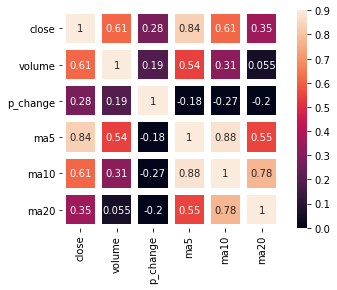

In [57]:
import seaborn as sns
sns.heatmap(df.corr(),vmin=0,vmax=0.9,annot=True,square=True,linewidths=6)

### K线图

In [68]:
import mplfinance as mpf

             Open   High    Low  Close      Volume
date                                              
2020-09-08  15.00  15.43  15.00  15.43  1407601.62
2020-09-07  14.88  15.24  14.83  14.94  1031376.81
2020-09-04  14.73  15.06  14.60  14.96   909890.00
2020-09-03  15.32  15.33  14.84  14.90  1279841.62
2020-09-02  15.01  15.53  15.01  15.32  1679383.00


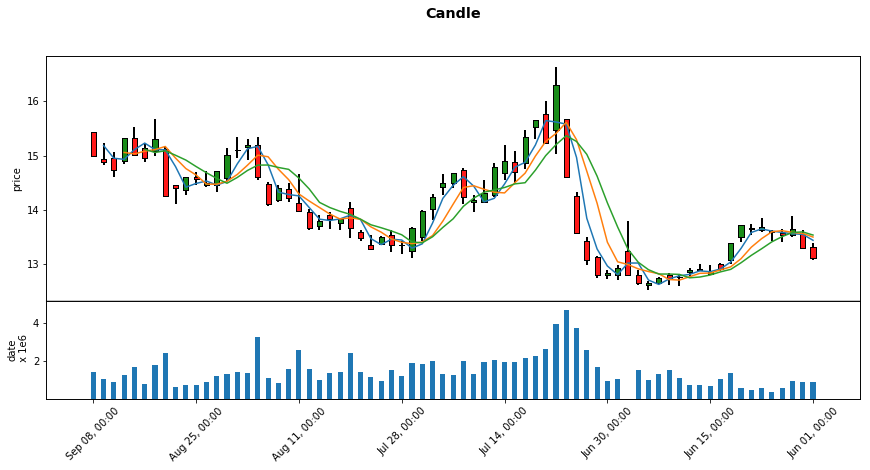

In [84]:
import mplfinance as mpf
import tushare as ts
import pandas as pd

def drawing(code,start):
    df = ts.get_hist_data(code,start)
    
    df.index = pd.DatetimeIndex(df.index)
    df = df[['open','high','low','close','volume']]
    df.columns = ['Open','High','Low','Close','Volume']
    print(df.head(5))
    kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(19,8),figscale=0.85)
    mc = mpf.make_marketcolors(up = 'r',down = 'g')#00ff00
    my_style = mpf.make_mpf_style(marketcolors=mc)
    mpf.plot(df,**kwargs,style=my_style,title='Candle', ylabel='price', ylabel_lower='date')#, savefig='my_image.png'
    plt.show() 
    
drawing('000001','2020-06-01')